# Strava analysis 

In [29]:
import json
import os
import requests
import urllib3
import pandas as pd
import numpy as np

import polyline


Connecting to Strava api

In [95]:
#get variables from config file

with open('config.json') as f:
    data = json.load(f)

client_id = data['client_id']
client_secret = data['client_secret']
refresh_token = data['refresh_token']


In [96]:
client_secret

'c4ea6a4acc8166738af2ba1422ebca0909b8b33d'

In [97]:
# define function to get a new access token
def get_access_token(client_id, client_secret, refresh_token):
    oauth_url = 'https://www.strava.com/oauth/token'

    payload = {
        'client_id': client_id,
        'client_secret': client_secret,
        'refresh_token': refresh_token,
        'grant_type': 'refresh_token',
        'f': 'json',
    }

    r = requests.post(oauth_url, data=payload, verify=False)

    access_token = r.json()['access_token']
    return access_token

# get new access token
access_token = get_access_token(client_id, client_secret, refresh_token)


In [98]:
# accessing all strava activites 

# The first loop, request_page_number will be set to one, so it requests the first page. Increment this number after
# each request, so the next time we request the second page, then third, and so on...
request_page_num = 1
all_activities = []

activities_url = 'https://www.strava.com/api/v3/athlete/activities'
header = {'Authorization': 'Bearer ' + access_token}

while True:
    param = {'per_page': 200, 'page': request_page_num}
    # initial request, where we request the first page of activities
    data = requests.get(activities_url, headers=header, params=param).json()

    # check the response to make sure it is not empty. If it is empty, that means there is no more data left. So if you have
    # 1000 activities, on the 6th request, where we request page 6, there would be no more data left, so we will break out of the loop
    if len(data) == 0:
        print("breaking out of while loop because the response is zero, which means there must be no more activities")
        break

    # if the all_activities list is already populated, that means we want to add additional data to it via extend.
    if all_activities:
        print("all_activities is populated")
        all_activities.extend(data)

    # if the all_activities is empty, this is the first time adding data so we just set it equal to my_dataset
    else:
        print("all_activities is NOT populated")
        all_activities = data

    request_page_num += 1

print("number of activies = " + str(len(all_activities)))


all_activities is NOT populated
all_activities is populated
all_activities is populated
all_activities is populated
breaking out of while loop because the response is zero, which means there must be no more activities
number of activies = 746


In [99]:
# data dictionaries
data_dictionaries = []
for page in data:
    data_dictionaries.extend(page)

In [100]:
# normalize data
activities = pd.json_normalize(data_dictionaries)

# normalize data
activities = pd.json_normalize(all_activities)


In [101]:
activities

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,...,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state
0,2,Lunch Run,9065.0,2389,2394,36.0,Run,Run,NaN,10289708430,...,garmin_ping_306920186932,False,0,0,False,27612131,1,a10289708430,et`yH|u|@AqAKaACgB[wEOeA_@oBa@}CWw@w@yAe@mBuAg...,2
1,2,Morning Run,9040.0,2582,2588,35.0,Run,Run,NaN,10283309044,...,garmin_ping_306727929781,False,0,0,False,27612131,1,a10283309044,at`yHfv|@Ei@@c@CaAMwAI{AMcB_@qCg@mB]gCQq@Ys@W]...,2
2,2,Morning Run,10399.3,3065,3226,107.5,Run,Run,0.0,10277349431,...,garmin_ping_306557433351,False,0,0,False,27612131,1,a10277349431,ct`yHfv|@CkAS}BMwBOyBa@aDq@mEKc@_@iAmAwCg@}ASe...,2
3,2,Morning Run,10649.0,3238,3248,60.0,Run,Run,0.0,10272291576,...,garmin_ping_306388405663,False,0,0,False,27612131,1,a10272291576,it`yHbv|@@kAIcDMkBUcCK_Bw@_FYiAe@sAm@oCe@gAg@a...,2
4,2,Lunch Run,7041.6,1841,1841,2.7,Run,Run,NaN,10267899389,...,garmin_ping_306256787338,False,0,0,False,27612131,1,a10267899389,cv`yHrv|@[oEGIM]Ks@WOi@Iy@VqAj@qDfAC?O_@Ku@CoA...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2,X15 50m hill sprints,1530.3,650,790,2.3,Run,Run,0.0,1537221796,...,1F5621FD-5FFA-41DD-BE94-EAEC824B9E88,False,0,0,False,27612131,1,a1537221796,o_snIpouHTnD,2
742,2,Dene hill loop,3877.5,1205,1535,79.9,Run,Run,0.0,1535251698,...,2918C7B1-C9C1-4978-9619-1B3F9FDA3CAD,False,7,0,False,27612131,1,a1535251698,w_snIpgwHvDi^qC_GoDqWoHdWiVfKmQhUyDtAWlDxVu[|U...,2
743,2,Rich hill sprints ft ELBO,4228.7,1509,1552,76.0,Run,Run,0.0,1507312301,...,92F4A047-B9E0-4864-9AD7-4DB0B8876D05,False,3,0,False,27612131,1,a1507312301,}e`yH`u|@~ApJhDgBfAnDpR{PaIai@qJ_RiIqHcFHaMhHi...,2
744,2,DOMS evening run,5412.2,1574,1835,46.8,Run,Run,0.0,1504668661,...,CFFFA15A-4E51-4DCF-BFD1-5738B40D3F80,False,0,0,False,27612131,1,a1504668661,ss`yHl{|@xKiE~B`KlCmBdBnDtRgQ_Igg@iIuQkFuF{E{B...,2


In [102]:
# add decoded summary polylines
#activities['map.polyline'] = activities['map.summary_polyline'].apply(polyline.decode)

In [103]:
activities.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_temp', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state'],
      dtype='object')

In [104]:
# Convert date strings to datetime objects
activities['start_datetime'] = pd.to_datetime(activities['start_date_local'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)

In [105]:
# Extract week of the year and year, and combine them into a new column
activities['week_and_year'] = activities['start_datetime'].dt.isocalendar().year.astype(str) + '-' + activities['start_datetime'].dt.isocalendar().week.astype(str)


In [106]:
activities

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,...,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,start_datetime,week_and_year
0,2,Lunch Run,9065.0,2389,2394,36.0,Run,Run,NaN,10289708430,...,0,0,False,27612131,1,a10289708430,et`yH|u|@AqAKaACgB[wEOeA_@oBa@}CWw@w@yAe@mBuAg...,2,2023-11-27 12:35:39+00:00,2023-48
1,2,Morning Run,9040.0,2582,2588,35.0,Run,Run,NaN,10283309044,...,0,0,False,27612131,1,a10283309044,at`yHfv|@Ei@@c@CaAMwAI{AMcB_@qCg@mB]gCQq@Ys@W]...,2,2023-11-26 09:36:55+00:00,2023-47
2,2,Morning Run,10399.3,3065,3226,107.5,Run,Run,0.0,10277349431,...,0,0,False,27612131,1,a10277349431,ct`yHfv|@CkAS}BMwBOyBa@aDq@mEKc@_@iAmAwCg@}ASe...,2,2023-11-25 08:27:47+00:00,2023-47
3,2,Morning Run,10649.0,3238,3248,60.0,Run,Run,0.0,10272291576,...,0,0,False,27612131,1,a10272291576,it`yHbv|@@kAIcDMkBUcCK_Bw@_FYiAe@sAm@oCe@gAg@a...,2,2023-11-24 06:51:38+00:00,2023-47
4,2,Lunch Run,7041.6,1841,1841,2.7,Run,Run,NaN,10267899389,...,0,0,False,27612131,1,a10267899389,cv`yHrv|@[oEGIM]Ks@WOi@Iy@VqAj@qDfAC?O_@Ku@CoA...,2,2023-11-23 12:32:40+00:00,2023-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2,X15 50m hill sprints,1530.3,650,790,2.3,Run,Run,0.0,1537221796,...,0,0,False,27612131,1,a1537221796,o_snIpouHTnD,2,2018-04-28 18:12:57+00:00,2018-17
742,2,Dene hill loop,3877.5,1205,1535,79.9,Run,Run,0.0,1535251698,...,7,0,False,27612131,1,a1535251698,w_snIpgwHvDi^qC_GoDqWoHdWiVfKmQhUyDtAWlDxVu[|U...,2,2018-04-27 19:14:01+00:00,2018-17
743,2,Rich hill sprints ft ELBO,4228.7,1509,1552,76.0,Run,Run,0.0,1507312301,...,3,0,False,27612131,1,a1507312301,}e`yH`u|@~ApJhDgBfAnDpR{PaIai@qJ_RiIqHcFHaMhHi...,2,2018-04-14 10:17:30+00:00,2018-15
744,2,DOMS evening run,5412.2,1574,1835,46.8,Run,Run,0.0,1504668661,...,0,0,False,27612131,1,a1504668661,ss`yHl{|@xKiE~B`KlCmBdBnDtRgQ_Igg@iIuQkFuF{E{B...,2,2018-04-12 19:02:15+00:00,2018-15


In [107]:
# filter activities to running only 

runs = activities[(activities['sport_type'] == 'Run')]

In [108]:
# Group by 'week_and_year' and sum the 'distance' column
running_distance_by_week = runs.groupby('week_and_year')['distance'].sum().reset_index()




In [109]:
import pandas as pd
from datetime import datetime, timedelta

# Function to get weeks and years between two dates
def generate_weeks(start_date, end_date):
    current_date = start_date
    while current_date <= end_date:
        yield current_date.isocalendar()[:2]
        current_date += timedelta(weeks=1)

# Define the start and end dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 12, 31)

# Generate weeks and years
weeks_and_years = list(generate_weeks(start_date, end_date))

# Create a DataFrame
df = pd.DataFrame(weeks_and_years, columns=['Year', 'Week'])

# Combine 'Year' and 'Week' into a single column in "YYYY-WW" format
df['week_year'] = df['Year'].astype(str) + '-' + df['Week'].apply(lambda x: f'{x:02d}')

# Drop the 'Year' and 'Week' columns if needed
df = df.drop(['Year', 'Week'], axis=1)


df

,week_year
0,2018-01
1,2018-02
2,2018-03
3,2018-04
4,2018-05
...,...
308,2023-48
309,2023-49
310,2023-50
311,2023-51


In [110]:
running_by_week = pd.merge(df, running_distance_by_week, how='left', left_on='week_year', right_on='week_and_year')

In [111]:
running_by_week.sample(10)

# Drop the duplicate 'week_year' column if needed
running_by_week = running_by_week.drop('week_and_year', axis=1)

# Fill NaN values with 0
running_by_week = running_by_week.fillna(0)

# Filter to show only 2023
running_by_week_2023 = running_by_week[running_by_week['week_year'].str.startswith('2023')]

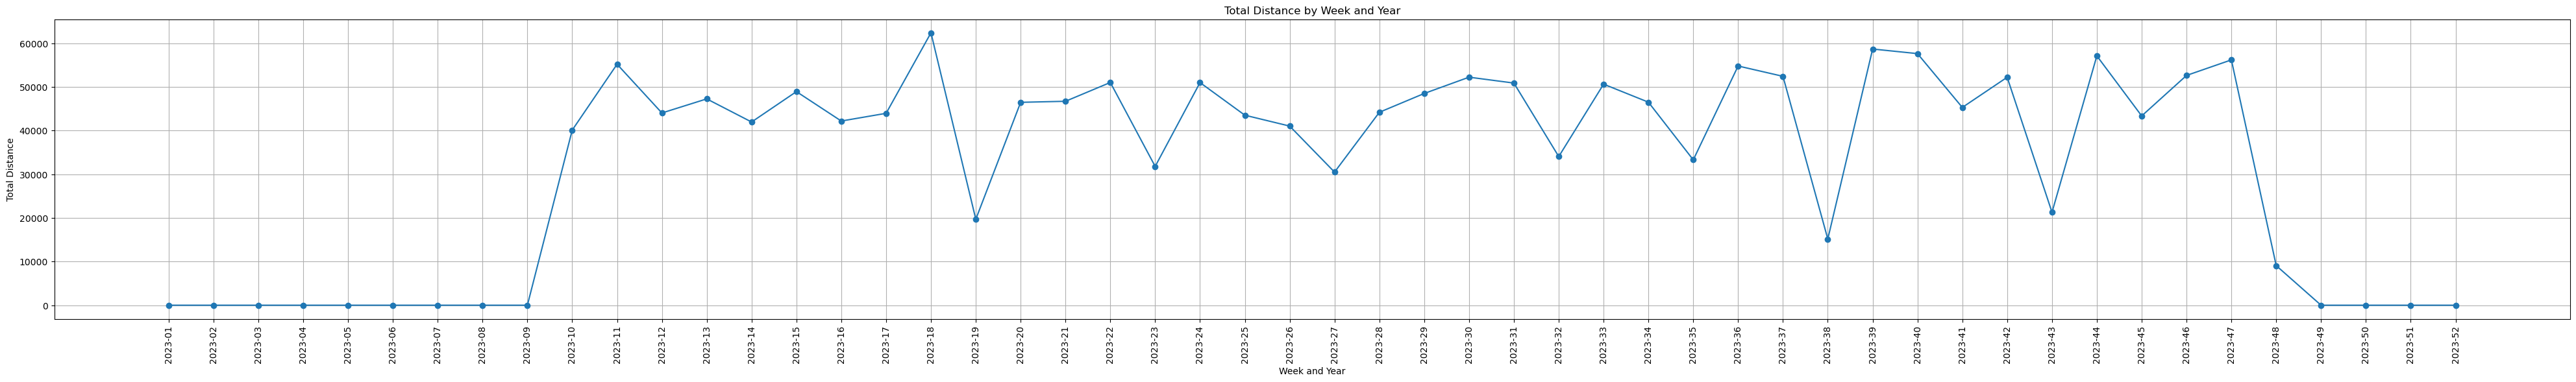

In [112]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(50, 6))
plt.plot(running_by_week_2023['week_year'], running_by_week_2023['distance'], marker='o', linestyle='-')
plt.title('Total Distance by Week and Year')
plt.xlabel('Week and Year')
plt.ylabel('Total Distance')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()